# FINAL PROJECT: tourism in Europe

## Airbnb cities from : Paris, Berlin, Madrid and Rome

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

### Shape dataframes

In [242]:
df_paris = pd.read_csv("../data/raw/listings_paris.csv")
df_paris["city"] = "Paris"
df_paris.shape

(84055, 80)

In [243]:
df_berlin = pd.read_csv("../data/raw/listings_berlin.csv")
df_berlin["city"] = "Berlin"
df_berlin.shape

(14187, 80)

In [244]:
df_madrid = pd.read_csv("../data/raw/listings_madrid.csv")
df_madrid["city"] = "Madrid"
df_madrid.shape

(26004, 80)

In [245]:
df_rome = pd.read_csv("../data/raw/listings_rome.csv")
df_rome["city"] = "Rome"
df_rome.shape

(34542, 80)

### Concatenate the 4 DataFrames

In [247]:
all_dfs = [df_paris, df_berlin, df_madrid, df_rome]

### Align columns (in case some differ a little)

In [249]:
all_cols = sorted(set().union(*(df.columns for df in all_dfs)))
all_dfs = [df.reindex(columns=all_cols) for df in all_dfs]

In [250]:
df_all = pd.concat(all_dfs, ignore_index=True)

In [251]:
print("Shape total :", df_all.shape)

Shape total : (158788, 80)


In [252]:
df_all.head()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,availability_eoy,bathrooms,bathrooms_text,bedrooms,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,source
0,2,"[""Kitchen"", ""Dishes and silverware"", ""Self che...",20,355,50,80,185,1.0,1 bath,1.0,...,5.00,5.00,5.00,5.00,5.00,5.00,0.08,Entire home/apt,20250606142312,city scrape
1,2,"[""Shampoo"", ""Long term stays allowed"", ""Portab...",7,69,37,54,69,1.0,1 bath,0.0,...,4.81,4.59,4.85,4.95,4.62,4.59,2.32,Entire home/apt,20250606142312,city scrape
2,4,"[""Shampoo"", ""Oven"", ""Microwave"", ""Hair dryer"",...",0,197,12,27,122,1.0,1 bath,2.0,...,4.92,4.45,4.89,4.94,4.73,4.74,2.20,Entire home/apt,20250606142312,city scrape
3,3,"[""Sound system"", ""Microwave"", ""Oven"", ""Outdoor...",0,0,0,0,0,NaN,1 bath,2.0,...,5.00,5.00,5.00,5.00,4.80,5.00,0.03,Entire home/apt,20250606142312,previous scrape
4,1,"[""Kitchen"", ""Wifi"", ""Heating"", ""Essentials"", ""...",23,358,53,83,190,1.0,1 bath,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,20250606142312,city scrape


In [253]:
print(df_all.columns.tolist())

['accommodates', 'amenities', 'availability_30', 'availability_365', 'availability_60', 'availability_90', 'availability_eoy', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'calendar_last_scraped', 'calendar_updated', 'city', 'description', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'first_review', 'has_availability', 'host_about', 'host_acceptance_rate', 'host_has_profile_pic', 'host_id', 'host_identity_verified', 'host_is_superhost', 'host_listings_count', 'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url', 'host_response_rate', 'host_response_time', 'host_since', 'host_thumbnail_url', 'host_total_listings_count', 'host_url', 'host_verifications', 'id', 'instant_bookable', 'last_review', 'last_scraped', 'latitude', 'license', 'listing_url', 'longitude', 'maximum_maximum_nig

In [254]:
df_all = df_all.rename(columns={"name": "listing_name"})

In [255]:
useful_cols = [
    "listing_name", "neighbourhood_cleansed",
    "latitude", "longitude", "room_type",
    "accommodates", "bedrooms", "beds", "bathrooms", "bathrooms_text",
    "price",
    "minimum_nights", "maximum_nights", "availability_365",
    "number_of_reviews", "review_scores_rating", "city"
]
df_selected = df_all[useful_cols].copy()

In [256]:
df_selected.head()

,listing_name,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,bathrooms,bathrooms_text,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,city
0,zen and calm,Observatoire,48.83191,2.31870,Entire home/apt,2,1.0,1.0,1.0,1 bath,$135.00,2,30,355,7,5.00,Paris
1,Your perfect Paris studio on Île Saint-Louis,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,2,0.0,1.0,1.0,1 bath,$114.00,1,730,69,452,4.62,Paris
2,MARAIS - 2ROOMS APT - 2/4 PEOPLE,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,4,2.0,1.0,1.0,1 bath,$149.00,10,130,197,380,4.73,Paris
3,Sunny apartment with balcony,Opéra,48.87417,2.34245,Entire home/apt,3,2.0,NaN,NaN,1 bath,NaN,7,365,0,5,4.80,Paris
4,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Louvre,48.86006,2.34863,Entire home/apt,1,1.0,1.0,1.0,1 bath,$75.00,180,360,358,0,NaN,Paris


In [257]:
df_selected["price"] = (df_selected["price"]
               .astype(str)
               .str.replace("[$,]", "", regex=True)
               .astype(float))

In [258]:
df_selected.head()

,listing_name,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,bathrooms,bathrooms_text,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,city
0,zen and calm,Observatoire,48.83191,2.31870,Entire home/apt,2,1.0,1.0,1.0,1 bath,135.0,2,30,355,7,5.00,Paris
1,Your perfect Paris studio on Île Saint-Louis,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,2,0.0,1.0,1.0,1 bath,114.0,1,730,69,452,4.62,Paris
2,MARAIS - 2ROOMS APT - 2/4 PEOPLE,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,4,2.0,1.0,1.0,1 bath,149.0,10,130,197,380,4.73,Paris
3,Sunny apartment with balcony,Opéra,48.87417,2.34245,Entire home/apt,3,2.0,NaN,NaN,1 bath,NaN,7,365,0,5,4.80,Paris
4,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Louvre,48.86006,2.34863,Entire home/apt,1,1.0,1.0,1.0,1 bath,75.0,180,360,358,0,NaN,Paris


In [259]:
print(df_selected["price"].isna().sum())

44574


In [260]:
df_selected = df_selected.dropna(subset=["price"])
print(df_selected.shape)

(114214, 17)


In [261]:
df_selected.head()

,listing_name,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,bathrooms,bathrooms_text,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,city
0,zen and calm,Observatoire,48.83191,2.31870,Entire home/apt,2,1.0,1.0,1.0,1 bath,135.0,2,30,355,7,5.00,Paris
1,Your perfect Paris studio on Île Saint-Louis,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,2,0.0,1.0,1.0,1 bath,114.0,1,730,69,452,4.62,Paris
2,MARAIS - 2ROOMS APT - 2/4 PEOPLE,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,4,2.0,1.0,1.0,1 bath,149.0,10,130,197,380,4.73,Paris
4,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Louvre,48.86006,2.34863,Entire home/apt,1,1.0,1.0,1.0,1 bath,75.0,180,360,358,0,NaN,Paris
5,room in an artist's flat with great view!,Buttes-Montmartre,48.88946,2.35867,Private room,1,1.0,1.0,1.0,1 shared bath,50.0,5,1125,82,63,4.63,Paris


In [262]:
print(df_selected["listing_name"].isna().sum())

0


In [263]:
df_selected = df_selected[df_selected["price"] != 0]

In [264]:
df_selected.shape

(114213, 17)

In [313]:
# Clean up ad names

df_selected["listing_name"] = (
    df_selected["listing_name"]
    .astype(str)
    .str.replace('"', '', regex=False)   # supprimer les guillemets doubles
    .str.replace("'", "", regex=False)   # supprimer les apostrophes simples
    .str.replace(r"[^a-zA-Z0-9\sÀ-ÖØ-öø-ÿ.,!?-]", "", regex=True)  # garder texte lisible
    .str.strip()
)

df_selected.head(10)

,listing_name,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,bathrooms,bathrooms_text,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,city
0,zen and calm,Observatoire,48.83191,2.318700,Entire home/apt,2,1.0,1.0,1.0,1 bath,135.0,2,30,355,7,5.00,Paris
1,Your perfect Paris studio on Île Saint-Louis,Hôtel-de-Ville,48.85247,2.358350,Entire home/apt,2,0.0,1.0,1.0,1 bath,114.0,1,730,69,452,4.62,Paris
2,MARAIS - 2ROOMS APT - 24 PEOPLE,Hôtel-de-Ville,48.85909,2.353150,Entire home/apt,4,2.0,1.0,1.0,1 bath,149.0,10,130,197,380,4.73,Paris
4,"Cozy, Central Paris WALK or VELIB EVERYWHERE !",Louvre,48.86006,2.348630,Entire home/apt,1,1.0,1.0,1.0,1 bath,75.0,180,360,358,0,NaN,Paris
5,room in an artists flat with great view!,Buttes-Montmartre,48.88946,2.358670,Private room,1,1.0,1.0,1.0,1 shared bath,50.0,5,1125,82,63,4.63,Paris
6,"Very Heart of Paris, Charming",Bourse,48.87006,2.345430,Entire home/apt,4,2.0,2.0,1.0,1 bath,100.0,7,730,202,153,4.24,Paris
8,Charming apartment on a cobbled street,Ménilmontant,48.85820,2.396500,Entire home/apt,2,1.0,1.0,1.0,1 bath,110.0,4,90,38,41,4.74,Paris
9,Charming appartment in paris 16 ème,Passy,48.84450,2.257610,Entire home/apt,2,2.0,2.0,1.0,1 bath,1350.0,7,40,363,50,4.73,Paris
10,sourdière Louvre Vendôme,Louvre,48.86752,2.331969,Entire home/apt,4,1.0,4.0,1.0,1 bath,249.0,3,25,168,40,4.25,Paris
11,Beautreillis Place des Vosges,Hôtel-de-Ville,48.85316,2.364740,Entire home/apt,4,1.0,1.0,1.0,1 bath,133.0,30,365,332,37,4.53,Paris


# Visualization

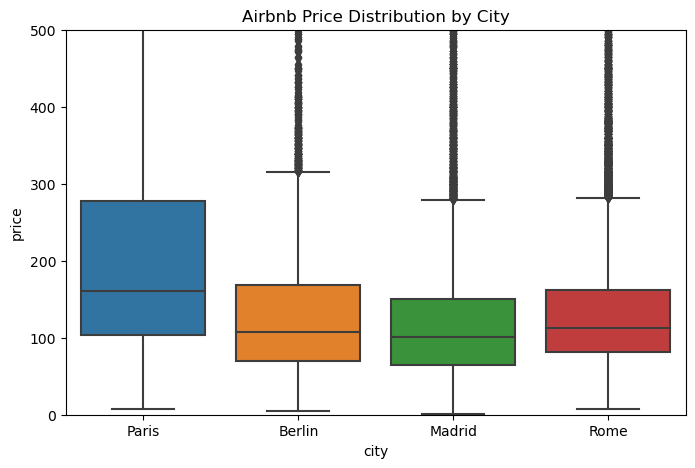

In [267]:
# 1- Price distribution by city

plt.figure(figsize=(8,5))
sns.boxplot(x="city", y="price", data=df_selected)
plt.ylim(0, 500)  # limit y-axis to ignore extreme outliers
plt.title("Airbnb Price Distribution by City")
plt.show()

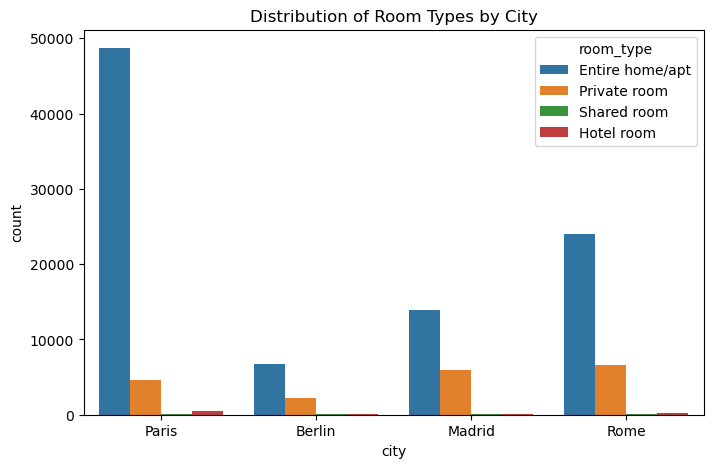

In [268]:
# 2. Room type distribution by city

plt.figure(figsize=(8,5))
sns.countplot(x="city", hue="room_type", data=df_selected)
plt.title("Distribution of Room Types by City")
plt.show()

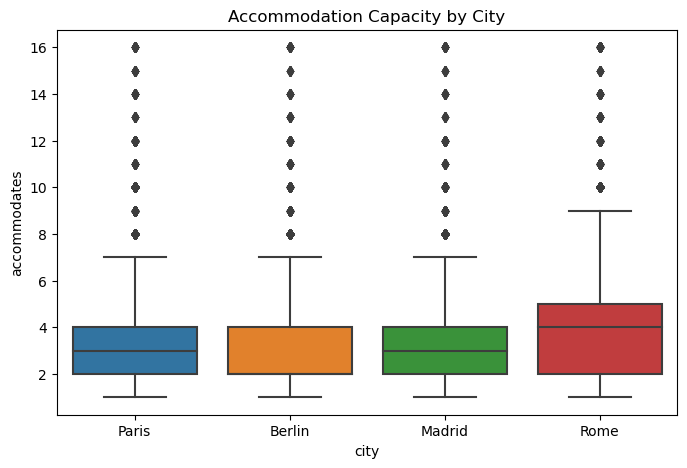

In [269]:
# 3. Accommodation capacity

plt.figure(figsize=(8,5))
sns.boxplot(x="city", y="accommodates", data=df_selected)
plt.title("Accommodation Capacity by City")
plt.show()

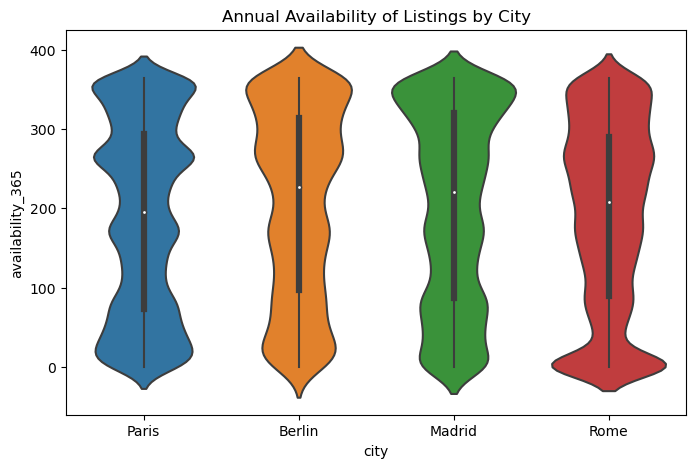

In [270]:
# 4. Availability (days per year)

plt.figure(figsize=(8,5))
sns.violinplot(x="city", y="availability_365", data=df_selected)
plt.title("Annual Availability of Listings by City")
plt.show()

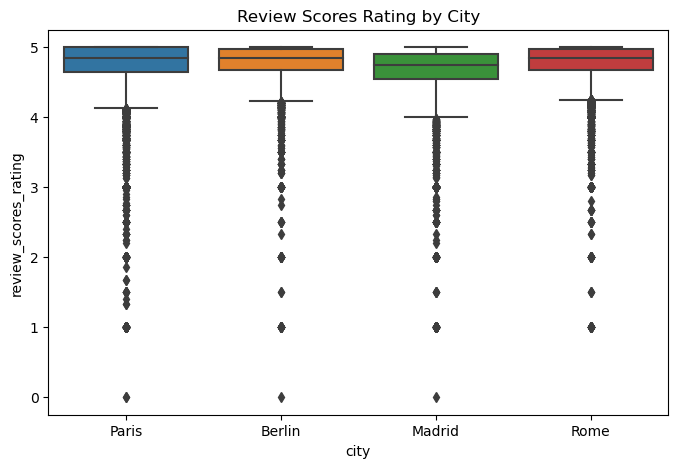

In [271]:
# 5. Review score distribution

plt.figure(figsize=(8,5))
sns.boxplot(x="city", y="review_scores_rating", data=df_selected)
plt.title("Review Scores Rating by City")
plt.show()

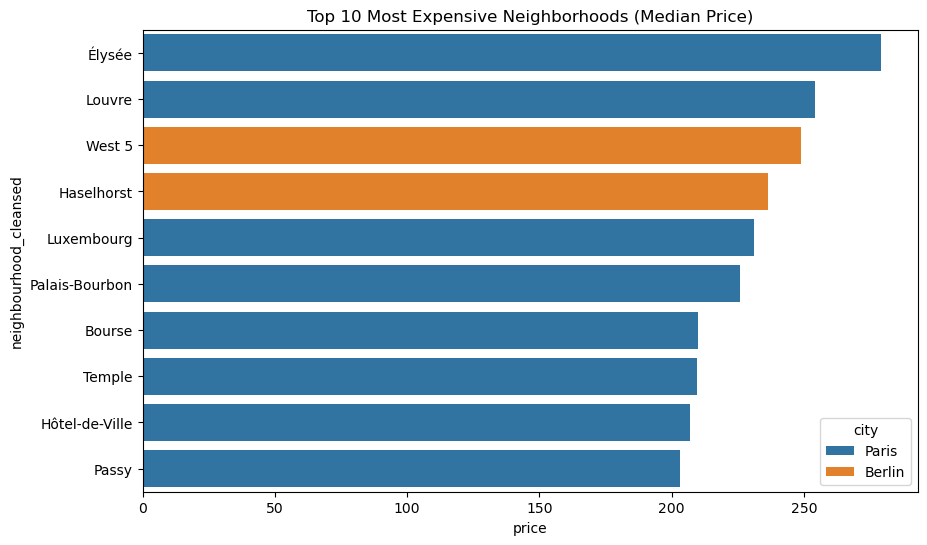

In [273]:
# 7. Top 10 most expensive neighborhoods (median price)

top_neigh = (
    df_selected.groupby(["city","neighbourhood_cleansed"])["price"]
    .median()
    .reset_index()
    .sort_values("price", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x="price", y="neighbourhood_cleansed", hue="city", data=top_neigh, dodge=False)
plt.title("Top 10 Most Expensive Neighborhoods (Median Price)")
plt.show()

In [274]:
df_selected.dtypes

listing_name               object
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
room_type                  object
accommodates                int64
bedrooms                  float64
beds                      float64
bathrooms                 float64
bathrooms_text             object
price                     float64
minimum_nights              int64
maximum_nights              int64
availability_365            int64
number_of_reviews           int64
review_scores_rating      float64
city                       object
dtype: object

In [315]:
#df_selected.to_csv("../data/clean/airbnb_clean.csv", index=False, encoding="utf-8", quoting=1)